# Merge and read csv_files

In [30]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Show the combined DataFrame
df = df[df["Experiment"] == "FR"]
#df=df[df['Name']=='else']
df.head()

,Name,Experiment,Trial,Sequence,Recall
0,liv,FR,1,r j k e o n u q a v s b p l z,r j k e o n z
1,liv,FR,2,i b d v n q r l k h f u g s e,i b d v n q r s e
2,liv,FR,3,u r l y c s b g h q m e a f v,u r l y c s b g h f e
3,liv,FR,4,v b m p a z d r k s c u l g f,v b m p l g
4,liv,FR,5,o y v j z k i a p f c x t q r,o y v j z k p t r


# Get positions and amount of correct recall

In [31]:
def add_position_and_correct_guesses(df, sequence_col="Sequence", recall_col="Recall"):
    # Helper function to get correct positions as a string
    def get_positions(row):
        s = row[sequence_col].split()
        r = row[recall_col].split()
        positions = []
        for i, word in enumerate(s):
            if word in r:
                positions.append(str(i))
        return " ".join(positions)

    # Add column with correct positions
    df["Position correct recall"] = df.apply(get_positions, axis=1)
    # Add column with amount of correct guesses
    df["Amount of correct guesses"] = df["Position correct recall"].apply(lambda x: len(x.split()))
    return df

df = add_position_and_correct_guesses(df)
df.head()

,Name,Experiment,Trial,Sequence,Recall,Position correct recall,Amount of correct guesses
0,liv,FR,1,r j k e o n u q a v s b p l z,r j k e o n z,0 1 2 3 4 5 14,7
1,liv,FR,2,i b d v n q r l k h f u g s e,i b d v n q r s e,0 1 2 3 4 5 6 13 14,9
2,liv,FR,3,u r l y c s b g h q m e a f v,u r l y c s b g h f e,0 1 2 3 4 5 6 7 8 11 13,11
3,liv,FR,4,v b m p a z d r k s c u l g f,v b m p l g,0 1 2 3 12 13,6
4,liv,FR,5,o y v j z k i a p f c x t q r,o y v j z k p t r,0 1 2 3 4 5 8 12 14,9


# Primacy and recency effect

In [32]:
# Total amount of FR experiments done
amount_of_experiments = df.shape[0]
print("Amount of FR experiments:", amount_of_experiments)

# Combine the lists of the correct positions to 1 big list
all_correct_positions= []
for row in df["Position correct recall"]:
    row = row.split()
    all_correct_positions.extend(row)
all_correct_positions = [int(x) for x in all_correct_positions]

# Average correct
average_correct = len(all_correct_positions) / amount_of_experiments
print("Average ammount of correct per experiment:", average_correct)

# Count of correct guesses for each position
correct_per_position= [all_correct_positions.count(position) for position in range(15)]

# Percent correct at each position out of all experiments
position_correct_percent = [corrects/amount_of_experiments*100 for corrects in correct_per_position] 

Amount of FR experiments: 80
Average ammount of correct per experiment: 9.0125


In [35]:
print(position_correct_percent)

[75.0, 76.25, 68.75, 56.25, 60.0, 53.75, 51.24999999999999, 41.25, 50.0, 55.00000000000001, 48.75, 53.75, 65.0, 70.0, 76.25]


Text(0.5, 1.0, 'Standard Free Recall')

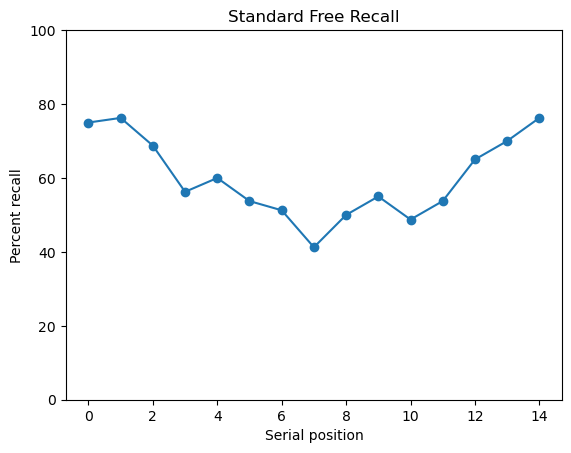

In [5]:
plt.plot(position_correct_percent, marker="o")
plt.xlabel("Serial position")
plt.ylim(0,100)
plt.ylabel("Percent recall")
plt.title("Standard Free Recall")

# Confidence Interval for amount of correct guesses

In [33]:
num_correct_in_experiments=df["Amount of correct guesses"].to_numpy()
num_correct_in_experiments

array([ 7,  9, 11,  6,  9,  9, 10,  6,  7,  8, 10,  8, 10,  8,  8,  6,  8,
        8, 11, 10,  8,  8,  8,  9, 10,  7, 10,  8,  8,  9,  9,  7,  7,  9,
       10,  9,  8,  9,  9, 11,  9, 11, 10,  9, 14, 11, 13, 11, 12, 11,  9,
       11, 12, 11, 11, 14, 12, 13,  9, 11, 10, 10,  9,  7,  6,  7,  6,  7,
        7,  7, 10,  9,  6,  7,  7,  8,  8,  7,  7, 10], dtype=int64)

In [34]:
x = num_correct_in_experiments
stats.t.interval(0.95, df = len(x)-1 , loc = x.mean(), scale = x.std(ddof=1)/np.sqrt(len(x)))

(8.586869924287667, 9.438130075712332)

The confidence interval for the mean of correct guesses for the Standard FR experiment is:

$[8.59 : 9.438]$